In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

import datetime
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

In [11]:
n = 500
ncols = 2
nrows = 500
np.random.seed(27)
series = pd.Series(np.random.weibull(7,n), index=pd.date_range(start='1-1-2020', periods=n), name='main process')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='2021-1-4', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])


In [12]:
s = series.blue.index.groupby(level=['year', 'week']).sum()

TypeError: scatter() missing 2 required positional arguments: 'index' and 'values'

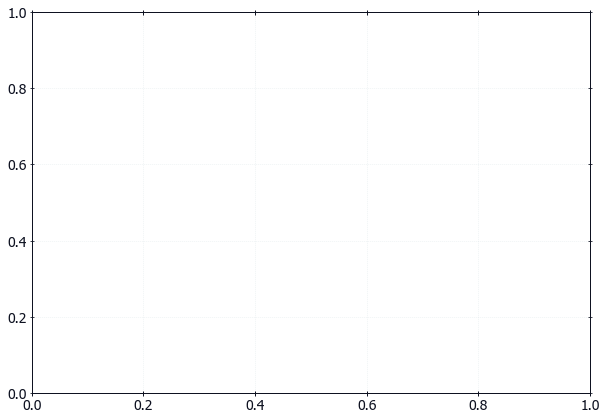

In [14]:
frame.blue.graph.scatter()

In [15]:
series.blue.performance.capability(target=1, lsl=0.7, usl=1.3).result

Process Data                       Potential Capability               Overall Capability                 
target         1                   Cp             0.62                Pp             0.62                
LSL            0.70000             Cpl            0.49                Ppl            0.49                
USL            1.30000             Cpu            0.75                Ppu            0.75                
mean           0.93659             Cpk            0.49                Ppk            0.49                
n              500                 CCpk           0.62                Cpm            0.58                
std within     0.16056             
std overall    0.16048             

Observed Performance               Expected Performance (Within)      Expected Performance (Overall)     
PPM < LSL      82000               PPM < LSL      70295               PPM < LSL      70196               
PPM > USL      0                   PPM > USL      11805               PPM > USL

In [17]:
series

2020-01-01    0.919243
2020-01-02    1.077400
2020-01-03    1.041528
2020-01-04    1.106049
2020-01-05    0.901393
                ...   
2021-05-10    1.100225
2021-05-11    0.921433
2021-05-12    1.005859
2021-05-13    0.612502
2021-05-14    0.953822
Freq: D, Name: main process, Length: 500, dtype: float64

In [ ]:
subgroups = blue.analysis.subgroups.get_subgroups(series, subgroup_size=1)

In [ ]:
series

In [ ]:
blue.statistics.std.StdWithin(subgroups).std

In [ ]:
pca = series.blue.ppa.process_capability(lb=0.7, target=1, usl=1.175)
#pca.plot(figsize=(12,5))

In [ ]:
pca.plot(figsize=(12,5))

In [ ]:
pca.result

In [ ]:
pca.md()

In [ ]:
import copy

In [ ]:
style = blue.styles.paper.process_capability.histogram_fill_in_range
style2 = blue.styles.paper.process_capability.histogram_fill_out_of_range

In [ ]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(series, hatch='//', fill=False)
def _set_patch_style(patch, style):
    for key in ['facecolor', 'edgecolor', 'linewidth', 'hatch', 'fill']:
        if key in style:
            eval(f'patch.set_{key}(style.get(key))')
        
lsl = 0.78
usl = 1.1

for patch in patches:
    
    
    # catch patches 
    if patch.get_x()+patch.get_width() <= lsl or patch.get_x() >= usl:
        patch.set_fill(False)
        patch.set_hatch('')
        patch_copy = copy.copy(patch)
        _set_patch_style(patch_copy, style2)
        ax.add_patch(patch_copy)
    
    elif patch.get_x() < lsl and patch.get_x()+patch.get_width() > lsl:
        # split patch
        patch.set_fill(False)
        patch.set_hatch('')
        # first half
        patch_width_1 = lsl - patch.get_x()#+patch.get_width())
        patch_copy = copy.copy(patch)
        _set_patch_style(patch_copy, style2)
        patch_copy.set_width(patch_width_1)
        ax.add_patch(patch_copy)
        
        # second half
        patch_width_2 = (patch.get_x()+patch.get_width()) - lsl
        patch_copy = copy.copy(patch)
        _set_patch_style(patch_copy, style)
        patch_copy.set_width(patch_width_2)
        patch_copy.set_x(patch.get_x()+patch_width_1)
        ax.add_patch(patch_copy)
        
    elif patch.get_x() > lsl and patch.get_x() + patch.get_width() <= usl:
        pass
    
    elif patch.get_x() > lsl and patch.get_x() <= usl and patch.get_x() + patch.get_width() > usl:
        # split patch
        patch.set_fill(False)
        patch.set_hatch('')
        # first half
        patch_width_1 = usl - patch.get_x()#+patch.get_width())
        patch_copy = copy.copy(patch)
        _set_patch_style(patch_copy, style)
        patch_copy.set_width(patch_width_1)
        ax.add_patch(patch_copy)
        
        # second half
        patch_width_2 = (patch.get_x()+patch.get_width()) - usl
        patch_copy = copy.copy(patch)
        _set_patch_style(patch_copy, style2)
        patch_copy.set_width(patch_width_2)
        patch_copy.set_x(patch.get_x()+patch_width_1)
        ax.add_patch(patch_copy)

In [5]:
style = blue.styles.paper.process_capability.histogram
style

{'density': True,
 'alpha': 1,
 'edgecolor': None,
 'facecolor': (0.1450980392156863, 0.43529411764705883, 0.7019607843137254),
 'fill': False,
 'hatch': '//',
 'linestyle': 'solid',
 'linewidth': 1}

In [6]:
k

NameError: name 'k' is not defined

In [7]:
key = 'edgecolor'
if key in style and style.get(key) is not None:
    print('a')

In [8]:
x = None
if x is not None and x + 1 > 10:
    print('a')

In [9]:
x = None
y = None
xy = x or y
z = 1
xy or z

1

In [10]:
2**3

8

In [11]:
math.pow(2,3)

8.0

In [12]:
math.sqrt(9)

3.0